In [1]:
from hod import HOD
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
halofile = '/home/rsujatha/MEGA/taurus_to_laptop/highres-halocat.txt'
catalogheader_names = ['M200b[0]','x[1]','y[2]','z[3]','Rvir[4]','Ax[5]','Ay[6]','Az[7]','Cx[8]','Cy[9]','Cz[10]','cvir[11]','spin[12]','c_to_a[13]','b_to_a[14]']
df_dtype = [('M200b[0]','f'),('x[1]','f'),('y[2]','f'),('z[3]','f'),('Rvir[4]','f'),('Ax[5]','f'),('Ay[6]','f'),('Az[7]','f'),('Cx[8]','f'),('Cy[9]','f'),('Cz[10]','f'),('cvir[11]','f'),('spin[12]','f'),('c_to_a[13]','f'),('b_to_a[14]','f')]
tp = pd.read_csv(halofile,names=catalogheader_names,dtype=df_dtype, delim_whitespace=True,comment='#',iterator=True, chunksize=1000,usecols=['M200b[0]','cvir[11]','spin[12]','c_to_a[13]','b_to_a[14]']) 
dfhr = pd.concat(tp, ignore_index=True) 

In [3]:
m200bhr = dfhr ["M200b[0]"]
cvirhr = dfhr ["cvir[11]"]
spinhr = dfhr ["spin[12]"]
cahr = dfhr ["c_to_a[13]"]
bahr = dfhr ["b_to_a[14]"]

In [4]:
logMmin = 11.95
sigmalogM = 0.65
h = HOD(logMmin,sigmalogM)
fa = h.convert_to_rank(m200bhr,cvirhr)
fb = h.convert_to_rank(m200bhr,spinhr)
fc = h.convert_to_rank(m200bhr,cahr)
fd = h.convert_to_rank(m200bhr,bahr)
fraction = h.N_central(m200bhr,fa,fb,fc,fd,-1,-1,-1,-1)
sel1 = h.get_centrals(fraction)

In [5]:
### sample the regular way without assembly bias
fraction2= h.N_central_stand(m200bhr)
sel2 = h.get_centrals(fraction2)

In [11]:
fraction = h.N_central(m200bhr,fa,fb,fc,fd,0.5,0.5,0.5,0.5)
sel3 = h.get_centrals(fraction)

In [12]:
M = np.logspace(11.3,14.5,25)
Mgp = np.sqrt(M[1:]*M[0:-1])
Nc = h.N_central_stand(Mgp)
Number_of_haloes,k = np.histogram(m200bhr,M)
Number_of_centrals,k = np.histogram(m200bhr[sel1],M)
Number_of_centrals3,k = np.histogram(m200bhr[sel3],M)
Number_of_centrals_standard,k = np.histogram(m200bhr[sel2],M)

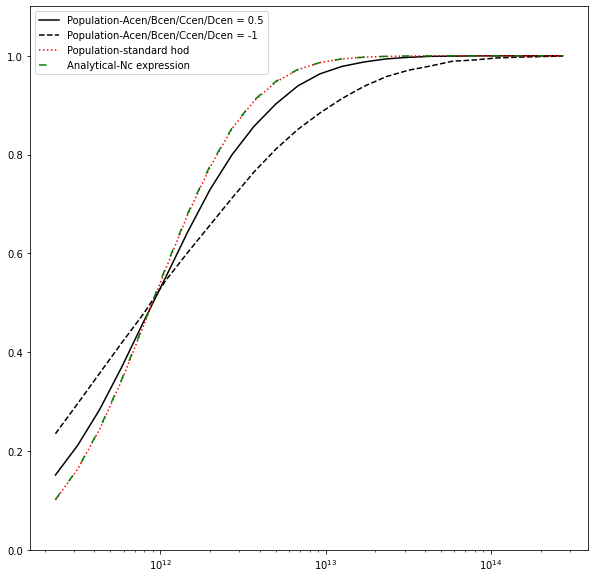

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(Mgp,Number_of_centrals3/Number_of_haloes,label='Population-Acen/Bcen/Ccen/Dcen = 0.5',color='k')
plt.plot(Mgp,Number_of_centrals/Number_of_haloes,label='Population-Acen/Bcen/Ccen/Dcen = -1',color='k',linestyle='dashed')
plt.plot(Mgp,Number_of_centrals_standard/Number_of_haloes,label='Population-standard hod',color='red',linestyle='dotted')
plt.plot(Mgp,Nc,label='Analytical-Nc expression',linestyle=(0,(5,10)),color='green')
plt.xscale('log')
plt.ylim([0,1.1])
plt.legend()